In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv('taxi.csv')

In [126]:
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [128]:
data.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


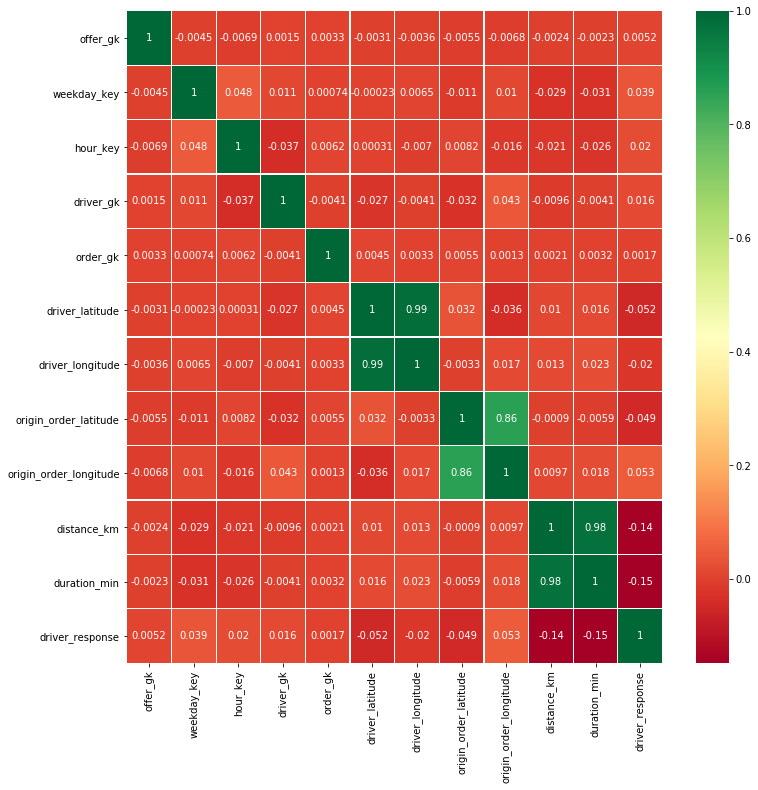

In [129]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Что меня напрягает?**  
1) distance_km и duration_min min отрицательное  
2) Что удаляем сразу   
 0   offer_gk - лишняя инфа, не нужен номер заказа  
 1   weekday_key            
 2   hour_key              
 3   driver_gk - лишняя инфа, не нужна инфа какой водитель сделал заказ  
 4   order_gk  - тоже лишняя инфа  
 5   driver_latitude        
 6   driver_longitude        
 7   origin_order_latitude   
 8   origin_order_longitude 
 9   distance_km             
 10  duration_min           
 11  offer_class_group       
 12  ride_type_desc          
 13  driver_response  

In [130]:
data.drop(['driver_gk', 'offer_gk', 'order_gk'], axis='columns', inplace=True)

In [131]:
data.duration_min.value_counts()

-1.000     26207
 0.000       152
 21.467       65
 56.833       64
 23.333       56
           ...  
 98.500        1
 59.750        1
 77.817        1
 93.850        1
 82.750        1
Name: duration_min, Length: 4728, dtype: int64

Предполагаю, что отрицательное расстояние и время - это метка -> N/A  
Таких значений 26%
Оставлять для обучения точно нельзя, лучше было бы заменить на среднее, но так как задача учебная и 74к данных хватит для дальнейшего обучения, то я просто удалю
Отдально отмечу, что корреляция между distance_km и duration_min почти 1 -> можно один признак удалить, с координатами это не рассматриваю, тк там широта и долгота

In [132]:
data = data.query('duration_min > 0')

In [133]:
data.drop(['distance_km'], axis='columns', inplace=True)

In [134]:
data['offer_class_group'].value_counts()

Economy     40764
Standard    29857
Premium      1005
Delivery      884
Kids          568
XL            444
VIP           108
VIP+           11
Name: offer_class_group, dtype: int64

In [135]:
def rename(param):
    if param['offer_class_group'] in ['Premium', 'Delivery', 'Kids', 'XL', 'VIP', 'VIP+']:
        return 'other'
    return param['offer_class_group']

In [136]:
data['offer_class_group'] = data.apply(rename, axis=1)

In [137]:
data['offer_class_group'].value_counts()

Economy     40764
Standard    29857
other        3020
Name: offer_class_group, dtype: int64

In [138]:
data['ride_type_desc'].value_counts()

private     73460
business      162
SMB            19
Name: ride_type_desc, dtype: int64

In [139]:
data = data.query('ride_type_desc == "private"')

In [140]:
data['ride_type_desc'].value_counts()

private    73460
Name: ride_type_desc, dtype: int64

Данный признак нам ничего не дает, можно его слить :)

In [141]:
data.drop(['ride_type_desc'], axis='columns', inplace=True)

In [142]:
data.query('origin_order_latitude < 0')

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,duration_min,offer_class_group,driver_response
1687,6,17,55.730637,37.491326,-1.0,-1.0,6.300,Economy,1
43328,3,10,55.762383,37.772572,-1.0,-1.0,21.433,Economy,1
43688,3,18,55.640164,37.534014,-1.0,-1.0,22.133,Standard,1
51365,0,20,55.619920,37.395172,-1.0,-1.0,32.967,Economy,0
56004,3,19,55.758792,37.749308,-1.0,-1.0,21.167,Economy,1
58769,2,7,55.638462,37.335678,-1.0,-1.0,47.300,Economy,0
64117,5,15,55.753351,37.667157,-1.0,-1.0,7.400,Standard,1
64694,3,20,55.741113,37.618121,-1.0,-1.0,20.200,other,1
67170,5,16,55.770791,37.511972,-1.0,-1.0,27.717,Standard,1
92696,5,15,55.786988,37.615918,-1.0,-1.0,12.517,Economy,0


In [143]:
data = data.query('driver_longitude > 0')
data = data.query('origin_order_latitude > 0')
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,duration_min,driver_response
count,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000,73439.000000
mean,3.149580,13.803143,55.780828,37.546413,55.780174,37.546074,31.773659,0.471221
std,2.079115,7.314889,0.157377,0.160334,0.159637,0.163129,35.766756,0.499174
min,0.000000,0.000000,55.367720,36.984771,55.342523,36.994072,0.017000,0.000000
25%,1.000000,8.000000,55.705795,37.413468,55.705604,37.407117,16.617000,0.000000
50%,3.000000,16.000000,55.774903,37.528158,55.775092,37.527110,28.233000,0.000000
75%,5.000000,20.000000,55.961104,37.625608,55.962322,37.625422,44.383000,1.000000
max,6.000000,23.000000,56.018542,38.232760,56.023522,38.204119,3958.283000,1.000000


In [145]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()

In [146]:
class_group = oh_enc.fit_transform(data[['offer_class_group']]).toarray()
class_group = pd.DataFrame(class_group, columns=oh_enc.categories_[0])
class_group.head(5)

,Economy,Standard,other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [147]:
data = data.reset_index(drop=True)
data.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,duration_min,offer_class_group,driver_response
0,5,14,55.805342,37.515023,55.819329,37.466398,25.217,Standard,1
1,6,14,55.813978,37.347688,55.814827,37.354074,9.800,Economy,0
2,4,16,55.803578,37.521602,55.812559,37.527407,19.250,Economy,1
3,6,15,55.818963,37.361033,55.814827,37.354074,9.800,Economy,0
4,5,20,55.839318,37.248862,55.839134,37.304101,3.933,Economy,0


In [148]:
data = data.join(class_group)
data.drop(['offer_class_group'], axis=1, inplace=True)
data.head(5)

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,duration_min,driver_response,Economy,Standard,other
0,5,14,55.805342,37.515023,55.819329,37.466398,25.217,1,0.0,1.0,0.0
1,6,14,55.813978,37.347688,55.814827,37.354074,9.800,0,1.0,0.0,0.0
2,4,16,55.803578,37.521602,55.812559,37.527407,19.250,1,1.0,0.0,0.0
3,6,15,55.818963,37.361033,55.814827,37.354074,9.800,0,1.0,0.0,0.0
4,5,20,55.839318,37.248862,55.839134,37.304101,3.933,0,1.0,0.0,0.0


**Данные готовы**  
Теперь  
Деление данных на тестовые и учебные  

In [149]:
from sklearn.model_selection import train_test_split
X = data.drop('driver_response', axis=1)  
y = data['driver_response'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state = 1000, stratify=y)

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
dr_response = RandomForestClassifier()
dr_response.fit(X_train, y_train)
# display(rfc.score(X_train, y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [159]:
y_pred = dr_response.predict(X_test)

In [160]:
from sklearn.metrics import confusion_matrix
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('Baseline Random Forest recall score', recall_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,25420,9530
actual 1,6084,25062


'Baseline Random Forest recall score'

0.8046619148526295

**Итог:**
Базовая RF-модель дала показатель 80.46%.  
В проверочном наборе данных была запись о 31146 заказах (**actual 1** 6084 25062
), которые взяли таксисты. Модель нашла 25062 из них.  
Можно улучшить данный показатель, если детальнее почистить данные, поработать с методом главных компонент.  
Но я считаю, что показатель 4/5 норм для тестового задания :)